# Evaluate token reuse

## Imports

In [1]:
from math import sqrt
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

## Evaluate token reuse to in domain classes

In [2]:
inclass_df = pd.read_pickle(f"../experiments/experiment_reuse-experiment-inclass-eval-1.pkl")

inclass_agg_df = pd.DataFrame ([
    {
        'Category': 'In-Class',
        'SD MAE (clipcount)' : inclass_df['sd_count_diff'].mean(),
        'Ours MAE (clipcount)' : inclass_df['sd_optimized_count_diff'].mean(),
        'SD RMSE (clipcount)' : sqrt((inclass_df['sd_count_diff'] ** 2).mean()),
        'Ours RMSE (clipcount)' : sqrt((inclass_df['sd_optimized_count_diff'] ** 2).mean()),
    }
])

inclass_agg_df

,Category,SD MAE (clipcount),Ours MAE (clipcount),SD RMSE (clipcount),Ours RMSE (clipcount)
0,In-Class,20.294652,9.571355,29.293537,12.883403


## Evaluate token reuse to in domain classes

In [3]:
indomain_df = pd.read_pickle(f"../experiments/experiment_reuse-experiment-indomain-eval-1.pkl")

indomain_agg_df = pd.DataFrame ([
    {
        'Category': 'In-Domain',
        'MAE' : indomain_df['sd_optimized_count_diff'].mean(),
        'RMSE' : sqrt((indomain_df['sd_optimized_count_diff'] ** 2).mean()),
    }
])

indomain_agg_df

,Category,MAE,RMSE
0,In-Domain,6.106306,7.070282


## Evaluate token reuse to out domain classes

In [4]:
outdomain_df = pd.read_pickle(f"../experiments/experiment_reuse-experiment-outdomain-eval-1.pkl")

outdomain_agg_df = pd.DataFrame ([
    {
        'Category': 'Out-of-Domain',
        'MAE' : outdomain_df['sd_optimized_count_diff'].mean(),
        'RMSE' : sqrt((outdomain_df['sd_optimized_count_diff'] ** 2).mean()),
    }
])

outdomain_agg_df

,Category,MAE,RMSE
0,Out-of-Domain,6.612103,8.106641


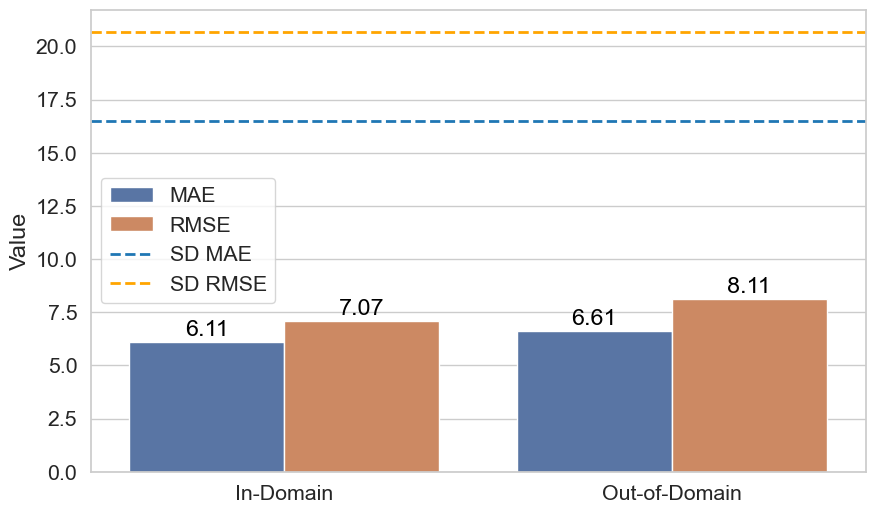

In [22]:
sd_indomain_mae = indomain_df['sd_count_diff'].mean() # same for out-domain
sd_indomain_rmse = sqrt((indomain_df['sd_count_diff'] ** 2).mean()) # same for out-domain


# Combine the dataframes
combined_df = pd.concat([indomain_agg_df, outdomain_agg_df])

# Melt the dataframe for easier plotting
melted_df = combined_df.melt(id_vars='Category', var_name='Metric', value_name='Value')

# Create the first bar plot for 'clipcount' metrics
plt.figure(figsize=(10, 6))
sns.set(style="whitegrid", font_scale=1.4)
ax = sns.barplot(data=melted_df, x='Category', y='Value', hue='Metric')

for p in ax.patches[:-2]:
    ax.annotate(f'{p.get_height():.2f}', 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='center', 
                xytext=(0, 9), textcoords='offset points', color='black')

plt.axhline(y=sd_indomain_mae, color='#1f77b4', linestyle='--', linewidth=2, label='SD MAE')
plt.axhline(y=sd_indomain_rmse, color='orange', linestyle='--', linewidth=2, label='SD RMSE')
# plt.title('Token reuse')
plt.ylabel('Value')
plt.xlabel('')
plt.xticks(rotation=0)
plt.legend()

plt.savefig('../figures/token_reuse_experiment.pdf', dpi=300, bbox_inches='tight')
plt.show()